In [1]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn import ensemble
from collections import defaultdict
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import math
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv('NewCompsData.csv', names=['Company', 'Type','Ev/Rev Multiple','Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'EBITDA Margin', 'Profit Margin'])
df = df.drop([0],axis=0)
df[['Ev/Rev Multiple','Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'EBITDA Margin', 'Profit Margin']] = df[['Ev/Rev Multiple','Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'EBITDA Margin', 'Profit Margin']].apply(pd.to_numeric)
x = df[['Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'EBITDA Margin', 'Profit Margin']] #use
y = df[['Ev/Rev Multiple']]
a = df[['Rev Growth','GP Margin','EBITDA Margin']] #use
b = df[['Rev Growth','GP Margin','EBITDA Margin','R&D Margin',]] #use
c = df[['Rev Growth','GP Margin','EBITDA Margin','S&M Margin']] #use
d = df[['Rev Growth','GP Margin','EBITDA Margin', 'Profit Margin']] #use
e = df[['Rev Growth','GP Margin', 'EBITDA Margin','R&D Margin', 'S&M Margin']] #use
f = df[['Rev Growth','GP Margin', 'EBITDA Margin','R&D Margin', 'Profit Margin']] #use
g = df[['Rev Growth','GP Margin', 'EBITDA Margin','S&M Margin', 'Profit Margin']] #use

In [3]:
databricks = [0.951862931344295,0.671300585943595,0.577080777881529,0.981899434820076,0.261273981475219,-1.14895360823323,-1.11333236039661]
db = pd.DataFrame([databricks], columns = ['Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'G&A Margin','EBITDA Margin', 'Profit Margin'])
db = db.drop(['G&A Margin'], axis=1)
db3 = db.drop(['R&D Margin', 'S&M Margin'],axis=1) #AB
db4 = db.drop(['R&D Margin', 'Profit Margin'],axis=1) #LM
db5 = db.drop(['R&D Margin'],axis=1)
db6 = db.drop(['Profit Margin'],axis=1)
db_test = 1600/66.65488
t = 1.98062600245909 #consistent with sample size at 95% confidence interval

In [4]:
GM = df[['GP Margin']]
RG = df[['Rev Growth']]
RD = df[['R&D Margin']]
SM = df[['S&M Margin']]
EM = df[['EBITDA Margin']]
NM = df[['Profit Margin']]

In [5]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=0)#ALL

In [6]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(c, y, test_size=0.3, random_state=0)#LM

In [7]:
x_train, x_test, y_train, y_test = train_test_split(d, y, test_size=0.3, random_state=0)#AB

In [8]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(g, y, test_size=0.3, random_state=0)#ALL

In [9]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(e, y, test_size=0.3, random_state=0)#ALL

In [10]:
y_val = y.values.flatten()
ytest_val = y_test.values.flatten()

In [12]:
model = LinearRegression()
model = model.fit(x_train0, y_train0)
model.score(x_test0,y_test0)

0.30804628300726644

In [11]:
model2 = ensemble.AdaBoostRegressor(random_state=0)
model2 = model2.fit(x_train,y_train.values.ravel())
model2.score(x_test,y_test)

0.4967192656016839

In [13]:
for idx, col_name in enumerate(x_train0.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))
intercept = model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The coefficient for Rev Growth is 14.147587578957872
The coefficient for GP Margin is 11.63085906280803
The coefficient for EBITDA Margin is -7.02880923393045
The coefficient for S&M Margin is -7.843558824125033
The intercept for our model is -0.9161478104081455


In [14]:
model3 = ensemble.AdaBoostRegressor(random_state=0)
model3 = model3.fit(x_train1,y_train1.values.ravel())
model3.score(x_test1,y_test1)

0.44658180451426915

In [15]:
model3 = ensemble.AdaBoostRegressor(random_state=0)
model3 = model3.fit(x_train1,y_train1.values.ravel())
model3.score(x_test1,y_test1)

0.44658180451426915

In [16]:
model4 = ensemble.AdaBoostRegressor(random_state=0)
model4 = model4.fit(x_train2,y_train2.values.ravel())
model4.score(x_test2,y_test2)

0.43140875343274515

In [17]:
model5 = ensemble.AdaBoostRegressor(random_state=0)
model5 = model5.fit(x_train3,y_train3.values.ravel())
model5.score(x_test3,y_test3)

0.3603633431286841

In [18]:
model6 = ensemble.GradientBoostingRegressor(random_state=0)
model6 = model6.fit(x_train,y_train.values.ravel())
model6.score(x_test,y_test)

0.5603732316676755

In [19]:
print (model.predict(db4), model2.predict(db3), model3.predict(db),model4.predict(db5),model5.predict(db6),model6.predict(db3) )

[[22.46852028]] [17.24465707] [22.46783098] [12.66547882] [9.18356419] [15.09069799]


In [20]:
yhat = model.predict(c).flatten()
SS_Residual1 = sum((y_val-yhat)**2)
std_err1 = math.sqrt(SS_Residual1/121)
moe_1 = std_err1 * 1.1 * t
print (std_err1,moe_1)
SS_Total = sum((y_val-np.mean(y_val))**2)
r_squared = 1 - (float(SS_Residual1))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_val)-1)/(len(y_val)-x.shape[1]-1)
print (r_squared,adjusted_r_squared)

3.2196767219064504 7.014672978412176
0.39521070352664434 0.3633796879227835


In [21]:
yhat = model2.predict(d)
yhat = yhat.flatten()
SS_Residual2 = sum((y_val-yhat)**2)
std_err2 = math.sqrt(SS_Residual2/121)
moe_2 = std_err2 * 1.1 * t
print (std_err2,moe_2)
SS_Total = sum((y_val-np.mean(y_val))**2)
r_squared = 1 - (float(SS_Residual2))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_val)-1)/(len(y_val)-x.shape[1]-1)
print (r_squared,adjusted_r_squared)

2.224548345950982 4.846598127489662
0.7112890482227185 0.6960937349712826


In [22]:
yhat = model.predict(x_test0).flatten()
SS_Residual1 = sum((ytest_val-yhat)**2)
std_err1 = math.sqrt(SS_Residual1/121)
moe_1 = std_err1 * 1.1 * t
print (std_err1,moe_1)

regression_model_mse = mean_squared_error(yhat, ytest_val)
print (math.sqrt(regression_model_mse))

SS_Total = sum((ytest_val-np.mean(ytest_val))**2)
r_squared = 1 - (float(SS_Residual1))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(ytest_val)-1)/(len(ytest_val)-x_test.shape[1]-1)
print (r_squared,adjusted_r_squared)

2.047365220843568 4.460571272226486
3.7024324584598096
0.30804628300726655 0.22155206838317487


In [23]:
yhat = model2.predict(x_test).flatten()
SS_Residual1 = sum((ytest_val-yhat)**2)
std_err1 = math.sqrt(SS_Residual1/121)
moe_1 = std_err1 * 1.1 * t
print (std_err1,moe_1)

regression_model_mse = mean_squared_error(yhat, ytest_val)
print (math.sqrt(regression_model_mse))

SS_Total = sum((ytest_val-np.mean(ytest_val))**2)
r_squared = 1 - (float(SS_Residual1))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(ytest_val)-1)/(len(ytest_val)-x_test.shape[1]-1)
print (r_squared,adjusted_r_squared)

1.7460712085463137 3.8041454415711975
3.1575757229286086
0.496719265601684 0.43380917380189454


In [24]:
yhat = model3.predict(x_test1).flatten()
SS_Residual1 = sum((ytest_val-yhat)**2)
std_err1 = math.sqrt(SS_Residual1/121)
moe_1 = std_err1 * 1.1 * t
print (std_err1,moe_1)

regression_model_mse = mean_squared_error(yhat, ytest_val)
print (math.sqrt(regression_model_mse))

SS_Total = sum((ytest_val-np.mean(ytest_val))**2)
r_squared = 1 - (float(SS_Residual1))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(ytest_val)-1)/(len(ytest_val)-x_test.shape[1]-1)
print (r_squared,adjusted_r_squared)

1.830979640488994 3.9891344745182677
3.3111231854042953
0.4465818045142691 0.3774045300785527


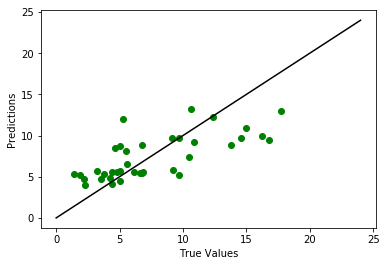

In [25]:
x23 = range(25)
y23 = range(25)
h = model2.predict(x_test)
plt.scatter(y_test,h, c="g")
plt.plot(x23,y23, c="k")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

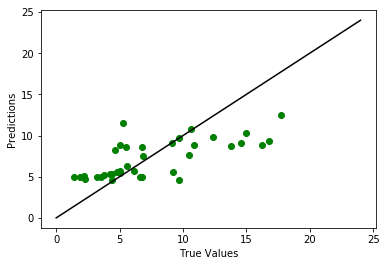

In [26]:
x23 = range(25)
y23 = range(25)
h = model3.predict(x_test1)
plt.scatter(y_test1,h, c="g")
plt.plot(x23,y23, c="k")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

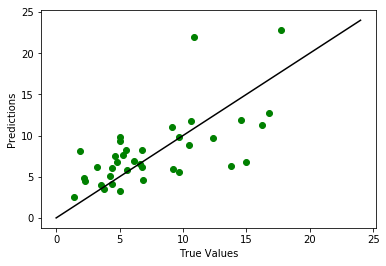

In [27]:
x23 = range(25)
y23 = range(25)
h = model.predict(x_test0)
plt.scatter(y_test0,h, c="g")
plt.plot(x23,y23, c="k")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

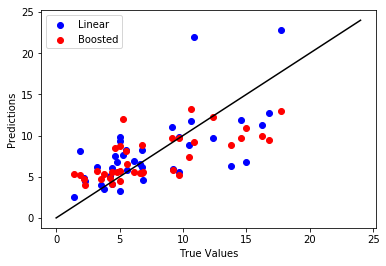

In [28]:
x23 = range(25)
y23 = range(25)
h = model.predict(x_test0)
i = model2.predict(x_test)
plt.scatter(y_test,h,label = "Linear", c="b")
plt.scatter(y_test,i,label = "Boosted", c="r")
plt.plot(x23,y23, c="k")
plt.legend()
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

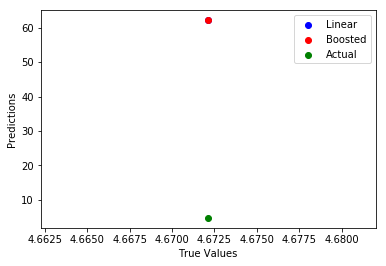

In [31]:
velo = [2.73,0.28,1.31,1.10,0.28,-3.69,-3.81]
vc = pd.DataFrame([velo], columns = ['Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'G&A Margin','EBITDA Margin', 'Profit Margin'])
vc = vc.drop(['G&A Margin'], axis=1)
vc3 = vc.drop(['R&D Margin', 'S&M Margin'],axis=1) #AB
vc4 = vc.drop(['R&D Margin', 'Profit Margin'],axis=1) #LM
vc5 = vc.drop(['R&D Margin'],axis=1)
vc6 = vc.drop(['Profit Margin'],axis=1)
vc_test = 285/61
t = 1.98062600245909 #consistent with sample size at 95% confidence interval
x23 = range(100)
y23 = range(100)
vcp1 = model.predict(vc4)
plt.scatter(vc_test,vcp1,label = "Linear", c="b")
vcp2 = model2.predict(vc3)
plt.scatter(vc_test,vcp1,label = "Boosted", c="r")
plt.scatter(vc_test,vc_test,label = "Actual", c="g")
plt.legend()
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

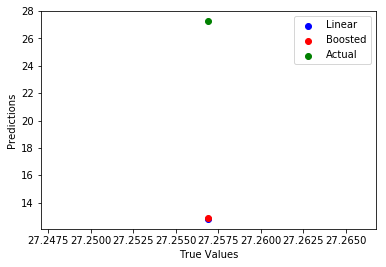

In [32]:
crowd = [0.433,0.547,0.472,0.901,0.240,-0.967,-1.086]
cr = pd.DataFrame([crowd], columns = ['Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'G&A Margin','EBITDA Margin', 'Profit Margin'])
cr = cr.drop(['G&A Margin'], axis=1)
cr3 = cr.drop(['R&D Margin', 'S&M Margin'],axis=1) #AB
cr4 = cr.drop(['R&D Margin', 'Profit Margin'],axis=1) #LM
cr_test = 3150/115.567
t = 1.98062600245909 #consistent with sample size at 95% confidence interval
x23 = range(100)
y23 = range(100)
crp1 = model.predict(cr4)
plt.scatter(cr_test,crp1,label = "Linear", c="b")
crp2 = model2.predict(cr3)
plt.scatter(cr_test,crp2,label = "Boosted", c="r")
plt.scatter(cr_test,cr_test,label = "Actual", c="g")
plt.legend()
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

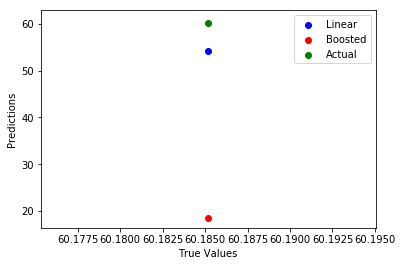

In [33]:
meso = [1.685,.73,0.506,0.375,0.119,-3.25,-3.25]
ms = pd.DataFrame([meso], columns = ['Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'G&A Margin','EBITDA Margin', 'Profit Margin'])
ms = ms.drop(['G&A Margin'], axis=1)
ms3 = ms.drop(['R&D Margin', 'S&M Margin'],axis=1) #AB
ms4 = ms.drop(['R&D Margin', 'Profit Margin'],axis=1) #LM
ms_test = 650/10.8
t = 1.98062600245909 #consistent with sample size at 95% confidence interval
x23 = range(100)
y23 = range(100)
msp1 = model.predict(ms4)
plt.scatter(ms_test,msp1,label = "Linear", c="b")
msp2 = model2.predict(ms3)
plt.scatter(ms_test,msp2,label = "Boosted", c="r")
plt.scatter(ms_test,ms_test,label = "Actual", c="g")
plt.legend()
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

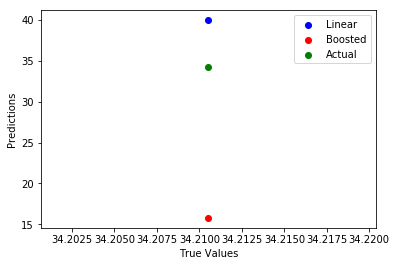

In [34]:
meso = [.672,.73,0.506,0.375,0.119,-3.25,-3.25]
ms = pd.DataFrame([meso], columns = ['Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'G&A Margin','EBITDA Margin', 'Profit Margin'])
ms = ms.drop(['G&A Margin'], axis=1)
ms3 = ms.drop(['R&D Margin', 'S&M Margin'],axis=1) #AB
ms4 = ms.drop(['R&D Margin', 'Profit Margin'],axis=1) #LM
ms_test = 650/19
t = 1.98062600245909 #consistent with sample size at 95% confidence interval
x23 = range(100)
y23 = range(100)
msp1 = model.predict(ms4)
plt.scatter(ms_test,msp1,label = "Linear", c="b")
msp2 = model2.predict(ms3)
plt.scatter(ms_test,msp2,label = "Boosted", c="r")
plt.scatter(ms_test,ms_test,label = "Actual", c="g")
plt.legend()
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

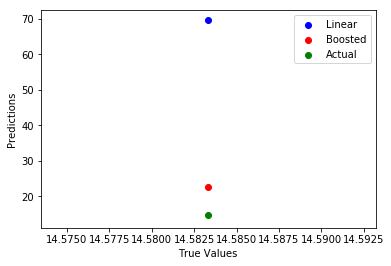

In [35]:
beam = [3.5341,0.82,0.12,0.09,0.240,-1.480,-1.02]
bm = pd.DataFrame([beam], columns = ['Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'G&A Margin','EBITDA Margin', 'Profit Margin'])
bm = bm.drop(['G&A Margin'], axis=1)
bm3 = bm.drop(['R&D Margin', 'S&M Margin'],axis=1) #AB
bm4 = bm.drop(['R&D Margin', 'Profit Margin'],axis=1) #LM
bm_test = 350/24
t = 1.98062600245909 #consistent with sample size at 95% confidence interval
x23 = range(100)
y23 = range(100)
h = model.predict(bm4)
plt.scatter(bm_test,h,label = "Linear", c="b")
l = model2.predict(bm3)
plt.scatter(bm_test,l,label = "Boosted", c="r")
plt.scatter(bm_test,bm_test,label = "Actual", c="g")
plt.legend()
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

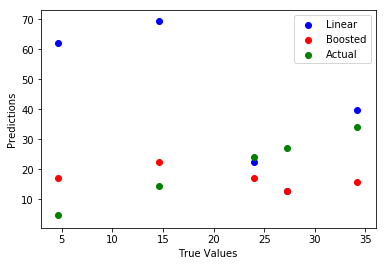

In [36]:
beam = [3.5341,0.82,0.12,0.09,0.240,-1.480,-1.02]
bm = pd.DataFrame([beam], columns = ['Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'G&A Margin','EBITDA Margin', 'Profit Margin'])
bm = bm.drop(['G&A Margin'], axis=1)
bm3 = bm.drop(['R&D Margin', 'S&M Margin'],axis=1) #AB
bm4 = bm.drop(['R&D Margin', 'Profit Margin'],axis=1) #LM
bm_test = 350/24
t = 1.98062600245909 #consistent with sample size at 95% confidence interval
x23 = range(100)
y23 = range(100)
h = model.predict(bm4)
l = model2.predict(bm3)
dbp1 = model.predict(db4)
dbp2 = model2.predict(db3)
plt.scatter(db_test,dbp1, label = "Linear", c="b")
plt.scatter(db_test,dbp2, label = "Boosted", c="r")
plt.scatter(db_test,db_test, label = "Actual", c="g")
plt.scatter(bm_test,h,  c="b")
plt.scatter(bm_test,l, c="r")
plt.scatter(bm_test,bm_test, c="g")
plt.scatter(cr_test,crp1,c="b")
plt.scatter(cr_test,crp2,c="r")
plt.scatter(cr_test,cr_test, c= "g")
plt.scatter(vc_test,vcp1, c="b")
plt.scatter(vc_test,vcp2, c="r")
plt.scatter(vc_test,vc_test, c= "g")
plt.scatter(ms_test,msp1, c="b")
plt.scatter(ms_test,msp2,c="r")
plt.scatter(ms_test,ms_test, c="g")
plt.legend()
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

In [38]:
y_val = y.values.flatten()
ytest_val = y_test.values.flatten()

In [ ]:
variables = [x,a,b,c,d,e,f,g]
for q in variables:
    x_train, x_test, y_train, y_test = train_test_split(q, y, test_size=0.2, random_state=0)  
    model = LinearRegression()
    model.fit(x_train, y_train)
    model.score(x_test,y_test)
    yhat = model.predict(x_test).flatten()
    SS_Residual1 = sum((ytest_val-yhat)**2)
    std_err1 = math.sqrt(SS_Residual1/121)
    moe_1 = std_err1 * 1.1 * t
    SS_Total = sum((ytest_val-np.mean(ytest_val))**2)
    r_squared = 1 - (float(SS_Residual1))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(ytest_val)-1)/(len(ytest_val)-x_test.shape[1]-1)
    print (adjusted_r_squared)

In [ ]:
variables = [x,a,b,c,d,e,f,g] 
state = range (100)
newdata={}
for w in state:
    col = []
    for q in variables:
        x_train, x_test, y_train, y_test = train_test_split(q, y, test_size=0.3, random_state=0)  
        model2 = ensemble.AdaBoostRegressor(random_state=w)
        model2.fit(x_train,y_train.values.ravel())
        yhat = model2.predict(x_test).flatten()
        SS_Residual1 = sum((ytest_val-yhat)**2)
        SS_Total = sum((ytest_val-np.mean(ytest_val))**2)
        r_squared = 1 - (float(SS_Residual1))/SS_Total
        adjusted_r_squared = 1 - (1-r_squared)*(len(ytest_val)-1)/(len(ytest_val)-x_test.shape[1]-1)
        col.append(adjusted_r_squared)
        newdata["State{}".format(w)] = col
newcol = pd.DataFrame (newdata)      
newcol.idxmax().value_counts()

In [7]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



In [8]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE

Scaled_Ridge: 0.077322 (+/- 0.552417)
Scaled_Lasso: 0.117250 (+/- 0.207435)
Scaled_Elastic: 0.105756 (+/- 0.162348)
Scaled_SVR: -0.102575 (+/- 1.028295)
Scaled_RF_reg: 0.075222 (+/- 0.310849)
Scaled_ET_reg: 0.305532 (+/- 0.213292)
Scaled_BR_reg: 0.061751 (+/- 0.312636)
Scaled_Hub-Reg: -0.147794 (+/- 0.998319)
Scaled_BayRidge: 0.075080 (+/- 0.497712)
Scaled_XGB_reg: 0.181799 (+/- 0.305442)
Scaled_DT_reg: -1.559795 (+/- 1.324117)
Scaled_KNN_reg: 0.226448 (+/- 0.290944)
Scaled_ADA-Reg: 0.304142 (+/- 0.237146)
Scaled_Linear: 0.069847 (+/- 0.569790)
Scaled_Gboost-Reg: 0.023154 (+/- 0.472579)
Scaled_RFR_PCA: 0.091061 (+/- 0.369901)
Scaled_XGBR_PCA: -0.009483 (+/- 0.402974)


NameError: name 'sns' is not defined

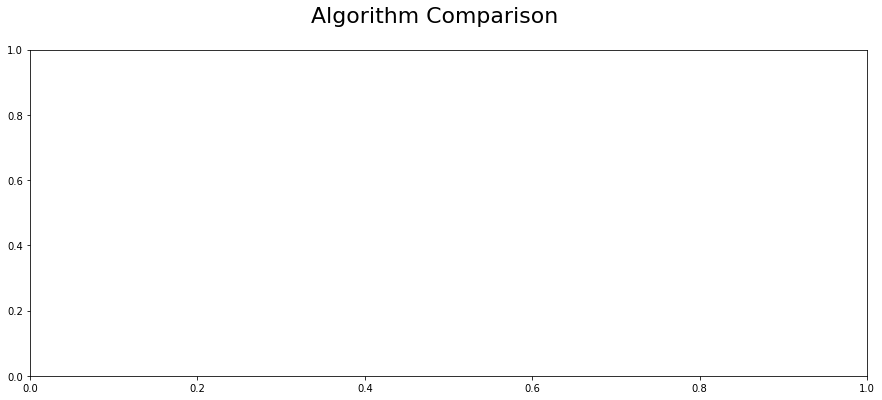

In [10]:
pipelines = []
seed = 2

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())
                 ]))) 
pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())
                 ]))) 

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))
pipelines.append(
                ("Scaled_ADA-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ADA-reg", AdaBoostRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_Linear",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Linear", LinearRegression())
                 ]))) 

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", RandomForestRegressor())
                 ])))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", XGBRegressor())
                 ])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train1, y_train1, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()